In [3]:
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(janitor)
library(dplyr) 
library(ggplot2)
options(repr.matrix.max.rows = 6)
install.packages("IRdisplay")
install.packages("rmarkdown") 
library(IRdisplay)
library(rmarkdown)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom  

# 1. Introduction
Video game engagement is influenced by a variety of player based factors. These may include a player's age, experience level and even their commitment to the game (subscription status). Understanding what drives a player to commit to a game can offer valuable insights to game developers, helping them design gameplay catered towards certain audiences. In our project, we explored whether a player's experience level and age can predict the number of hours they spend playing. Specifically, we asked the question:

__Can player experience and age predict a player's playing hours in the players dataset?__ We asked this question in hopes of helping answer the broader question of what types of players may contribute the most amount of data, since more playing time will likely lead to more actions and data gathered.

To answer this question we used the players.csv dataset, containing information about individual players which included their experience level, subscription status, hashed email, number of hours played, name, gender, and age.

A description of some of the variables are:

- Experience: Categorical label with levels such as Pro, Veteran, and Amateur determining the players proficiency in the game 
- Played_hours: A numerical variable representing how much player has spent on the game 
- Age: A numerical value representing the age of the player 
- There are other variable present but our focus is on how __experience__ and __age__ would impact played_hours 

By analyzing data within the dataset we hope to build a model that may accurately, precisely and consistently predict a players engagement with only two variables: experience and age. 


# 2. Methods and Results

## Loading in Datasets

To load in the datasets, we make a repository then download the given files. We then upload them onto the repository and get a link, which can be used in read_csv to get the dataset. Although the sessions.csv dataset wasn't used, it was read to prove that both data sets could be read in using the same method.

In [4]:
player_link <- "https://raw.githubusercontent.com/Shervin2006/DSCI100-Project/refs/heads/main/players.csv"
session_link <- "https://raw.githubusercontent.com/Shervin2006/DSCI100-Project/refs/heads/main/sessions.csv"

# Read the CSV files into data frames
players <- read_csv(player_link)
sessions <- read_csv(session_link)

head(sessions)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


# Wrangling and Summary Values

In [5]:
# Remove NA values for the three variables that we plan to use in K-NN Regression
player_data <- players |>
  filter(!is.na(Age) & !is.na(experience) & !is.na(played_hours))

# Mean hours played relative to Experience
wrangled_player_data_hrs <- player_data |>
  group_by(experience) |>
  summarise(average_playtime_hrs = mean(played_hours, na.rm = TRUE)) |>
  arrange(desc(average_playtime_hrs)) |>
  slice_head(n = 6)
print(wrangled_player_data_hrs)

# Mean hours played relative to Gender
wrangled_player_data_gender <- player_data |>
  group_by(gender) |>
  summarise(average_playtime_hrs = mean(played_hours, na.rm = TRUE)) |>
  arrange(desc(average_playtime_hrs)) |>
  slice_head(n = 6)
print(wrangled_player_data_gender)

# Count the number of people per Gender
number_of_people_per_gender <- player_data |>
  group_by(gender) |>
  summarise(total_players = n())
print(number_of_people_per_gender)

# Mean hours played relative to Age
wrangled_player_data_age <- player_data |>
  group_by(Age) |>
  summarise(average_playtime_hrs = mean(played_hours, na.rm = TRUE)) |>
  arrange(desc(average_playtime_hrs)) |>
  slice_head(n = 6)
print(wrangled_player_data_age)

# Mean for each numeric variable: played_hours, Age, and subscription rate (using subscribe as logical)
mean_values <- player_data |>
  summarise(
    Mean_Played_Hours = mean(played_hours, na.rm = TRUE),
    Mean_Age = mean(Age, na.rm = TRUE),
    Mean_Subscription = mean(subscribe, na.rm = TRUE)  # TRUE is treated as 1, FALSE as 0
  )
print(mean_values)

# A tibble: 5 × 2
  experience average_playtime_hrs
  <chr>                     <dbl>
1 Regular                  18.7  
2 Amateur                   6.02 
3 Pro                       2.78 
4 Beginner                  1.25 
5 Veteran                   0.648
# A tibble: 6 × 2
  gender            average_playtime_hrs
  <chr>                            <dbl>
1 Non-binary                      14.9  
2 Female                          10.6  
3 Agender                          6.25 
4 Male                             4.13 
5 Prefer not to say                0.373
6 Two-Spirited                     0.08 
# A tibble: 6 × 2
  gender            total_players
  <chr>                     <int>
1 Agender                       2
2 Female                       37
3 Male                        124
4 Non-binary                   15
5 Prefer not to say            11
6 Two-Spirited                  5
# A tibble: 6 × 2
    Age average_playtime_hrs
  <dbl>                <dbl>
1    16                 50.0
2  

# Exploratory Visuals

# A tibble: 1 × 2
  Mean_Played_Hours Mean_Age
              <dbl>    <dbl>
1              5.85     20.5


Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


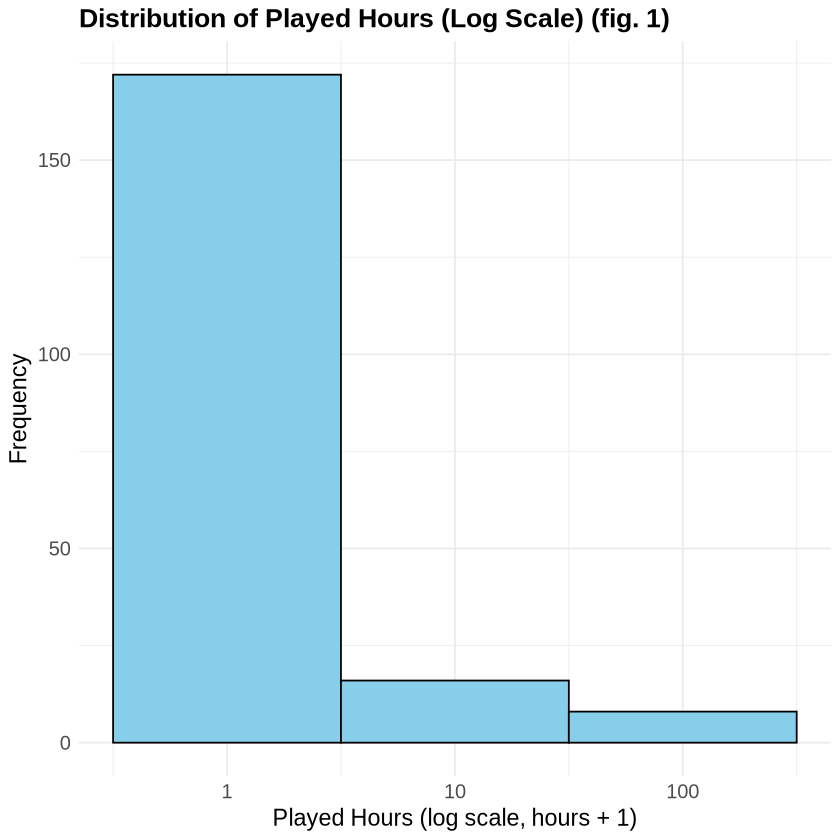

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


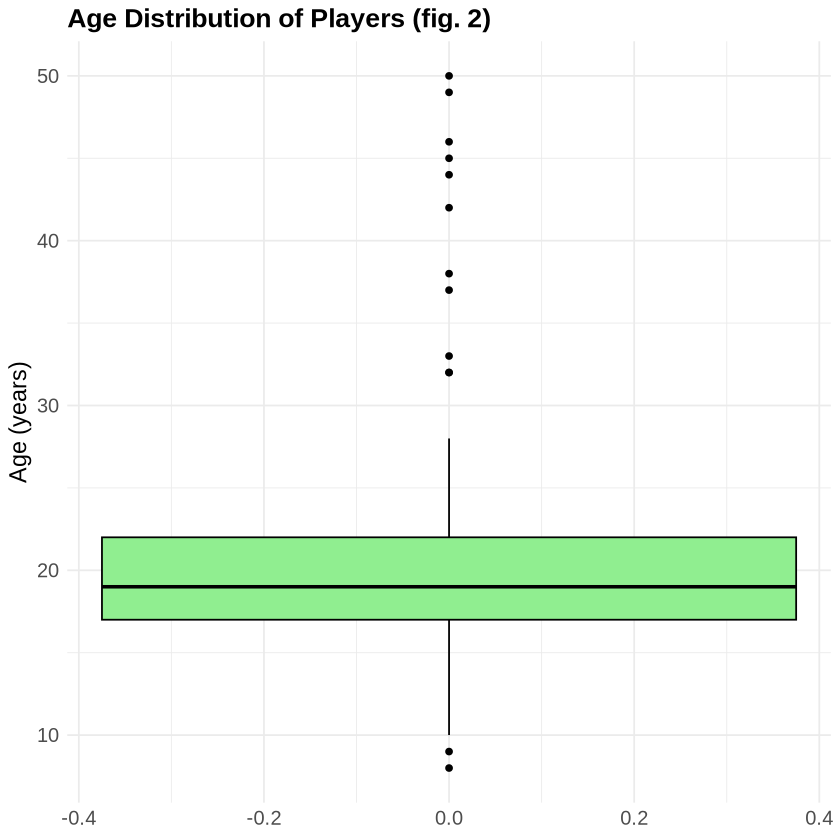

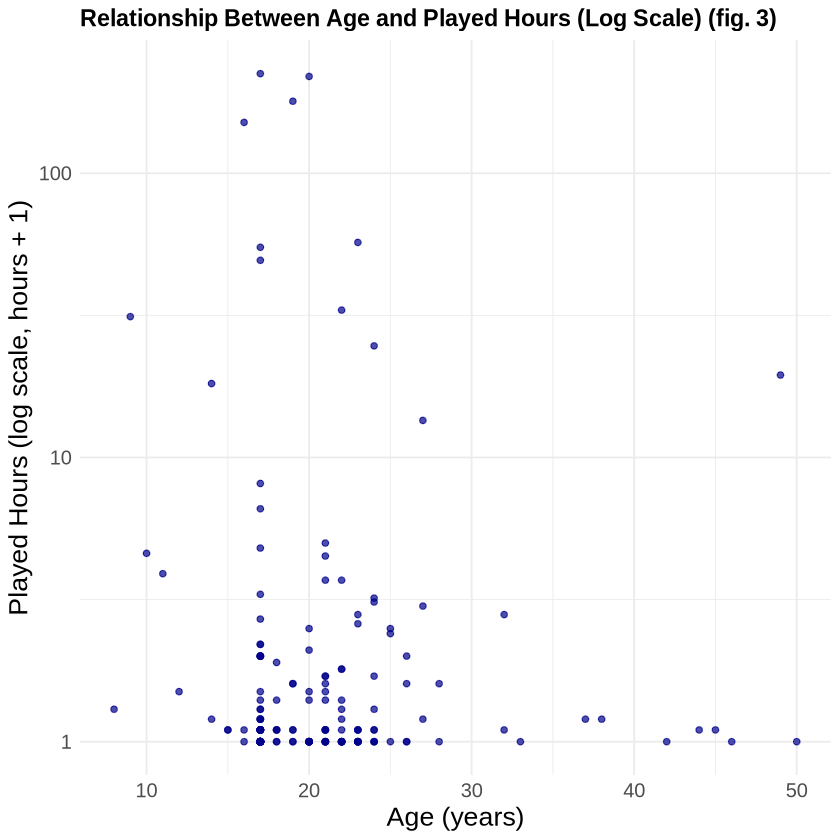

In [6]:
# Compute mean values for quantitative variables: played_hours and Age
mean_table <- players |>
  dplyr::summarise(
    Mean_Played_Hours = mean(played_hours, na.rm = TRUE),
    Mean_Age = mean(Age, na.rm = TRUE)
  )
print(mean_table)

# Create a histogram of played_hours with log scaling on the x-axis.
# We add 1 to played_hours to avoid issues with log(0).
histogram_plot <- players |>
  ggplot(aes(x = played_hours + 1)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  scale_x_log10() +
  labs(
    title = "Distribution of Played Hours (Log Scale) (fig. 1)",
    x = "Played Hours (log scale, hours + 1)",
    y = "Frequency"
  ) +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  )
print(histogram_plot)

# Create a boxplot for the Age distribution.
# (Age is typically not skewed enough to require log scaling, so we leave it as is.)
boxplot_age <- players |>
  ggplot(aes(y = Age)) +
  geom_boxplot(fill = "lightgreen", color = "black") +
  labs(
    title = "Age Distribution of Players (fig. 2)",
    y = "Age (years)"
  ) +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  )
print(boxplot_age)

# Create a scatterplot of Age vs. Played Hours with log scaling on the y-axis.
# We add 1 to played_hours to avoid issues with log(0).
scatter_plot <- players |>
  ggplot(aes(x = Age, y = played_hours + 1)) +
  geom_point(color = "darkblue", alpha = 0.7) +
  scale_y_log10() +
  labs(
    title = "Relationship Between Age and Played Hours (Log Scale) (fig. 3)",
    x = "Age (years)",
    y = "Played Hours (log scale, hours + 1)"
  ) +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 16),
    plot.title = element_text(size = 14, face = "bold")
  )
print(scatter_plot)

## Exploratory Analysis and Visualization Explanation
This step is crucial for understanding the baseline characteristics of our players, which is a key component of our research question: __"Which kinds of players are most likely to contribute a large amount of data?"__

__Mean Values Calculation:__
We computed the mean played hours and mean age to obtain baseline metrics of overall player engagement and demographics. Higher average played hours can indicate greater overall engagement, which is likely correlated with higher data contribution.

__Histogram of Played Hours (Log Scale):__
The histogram shows the distribution of played hours among players. Since the data is highly skewed (many players with low playtime and a few with very high playtime), we applied log scaling (after adding 1 to avoid log(0)). This transformation improves readability by compressing the scale, allowing us to better visualize the spread and identify potential heavy data contributors.

__Boxplot of Age:__
The boxplot provides a summary of the age distribution, highlighting the median, quartiles, and any outliers. Age is an important factor in our research question because it may influence player behavior and engagement. Understanding the age distribution helps us assess whether certain age groups are more active and thus more likely to contribute large volumes of data.

__Scatterplot of Age vs. Played Hours (Log Scale):__
The scatterplot examines the relationship between Age and Played Hours. By applying a log scale on played hours, we reduce the effect of extreme values and clarify the trend. This plot helps identify whether there is an association between a player’s age and their engagement (as measured by played hours), which can inform our understanding of which players are likely heavy data contributors.

Overall, these analyses provide essential insights into the players' engagement patterns and demographics. They form the foundation for further predictive modeling by revealing which characteristics (such as high played hours, specific age ranges, or particular experience levels) may indicate a greater likelihood of contributing substantial session data.

## Data Analysis
For this data analysis, we will use the K-NN regression method as we are predicting a numerical value (played_hours) and we believe that the relationship between predictors and played_hours is __not__ linear.

To do a K-NN regression, we first need to split the players dataset into two different sets; one training and one testing set. We will use a 75% and 25% split for training and testing respectively, as it has shown to be a good proportion for training and testing. Three datasets will be created here: __player_split__, __player_testing__ and __player_training__.

In [13]:
set.seed(1000)

player_split <- player_data |> initial_split(prop = 0.75, strata = played_hours)
player_training <- training(player_split)
player_testing <- testing(player_split)

We will then use the tuning method to find the best value for k to use in our analysis, making a model called __player_spec__. Because we don’t want the analysis to take too long nor slow the servers down, we decided to only test values of k ranging from 1 to 10, using the gridvals function.

In [14]:
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

We will then create our recipe (called __player_recipe__) to use in preparation for the prediction, and put this and __player_spec__ into a workflow, which we will call __player_workflow__. For the recipe, we standardize the Age variable using step_scale and step_center to make sure it doesn’t have an impact on the K-NN process. 

We also use a 5-fold cross validation to take the average of the RMSE using vfold_cv, called __player_vfold__. This will help reduce the impact of abnormally high or low RMSE values, increasing the chance that the RMSE is accurate.

In [15]:
player_recipe <- recipe(played_hours ~ experience + Age, data = player_training) |>
      step_scale(Age) |>
      step_center(Age)
player_recipe

player_vfold <- vfold_cv(player_training, v = 5, strata = played_hours)
player_workflow <- workflow() |> add_model(player_spec) |> add_recipe(player_recipe) 



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: Age

• Centering for: Age



The next step will be to get the results from the workflow. We will make another data frame called __player_results__, using tune_grid and collect_metrics() to get the k values and their corresponding RMSE values. 

Then, we make a dataframe called __player_min__, where we can use filter and slice_min to get only the “rmse” values for the .metric column and the minimum RMSE. We then note the value from the “n” column of this row, which is the k value, as it is the one that gives the best RMSE value.

In [16]:
player_results <- player_workflow |> tune_grid(resamples = player_vfold, grid = gridvals) |> collect_metrics()
player_results

player_min <- player_results |>
   filter(.metric == "rmse") |>
   slice_min(mean, n = 1)
player_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,38.25048814,5,10.83161618,Preprocessor1_Model01
1,rsq,standard,0.03153138,5,0.02019863,Preprocessor1_Model01
2,rmse,standard,27.62411626,5,7.05485709,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,rsq,standard,0.12771664,5,0.06577485,Preprocessor1_Model09
10,rmse,standard,25.75846618,5,5.55629861,Preprocessor1_Model10
10,rsq,standard,0.09587819,5,0.04868318,Preprocessor1_Model10


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,24.74947,5,5.842939,Preprocessor1_Model07


After getting the k value, we will do a knn-regression using the training data set with that k value and make a visualization of it to look at how closely the prediction matches the actual played_hours variable. To get the k value, we can use pull(neighbors) on the __player_min__ dataframe. 

We can use the same recipe as before, since there haven’t been any changes with it. We make a new model called __player_best_spec__ which uses the k value that we obtained from the previous part of the analysis, and then use a workflow, which we will call __player_best_fit__. Finally, we make a new dataframe called __player_summary__ which uses predict, bind_cols and metrics() to get the RMSE value.

In [17]:
k_min <- player_min |>
         pull(neighbors)

player_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

player_best_fit <- workflow() |>
         add_recipe(player_recipe) |>
         add_model(player_best_spec) |>
         fit(data = player_training)

player_summary <- player_best_fit |>
          predict(player_testing) |>
          bind_cols(player_testing) |>
          metrics(truth = played_hours, estimate = .pred) 
 
player_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,34.111742352
rsq,standard,0.003541764
mae,standard,9.623032070


To make the visualization, we first make a new dataset called __player_preds__ by using bind_cols on our workflow and our testing dataset, so we can have the predicted values column on the same dataframe as the actual values for played_hours, making it easier to visualize it. 

We then use ggplot with __player_preds__ to make our visualization, which we will call __player_plot__. We also color the points and include a legend to display the experience level of each observation. We use geom_point() for the actual observations from the testing dataset and geom_line() to show the predicted values from the knn-regression process. 

Finally, we add titles for the graph, x and y axis, as well as the legend for the color to make it readable.

.pred,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<dbl>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
0.01428571,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
0.10000000,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
0.02857143,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
12.71428571,Amateur,TRUE,42382bb2af563e6979c5b84d288cbb49bb2ef90b1bcf196c2902da4ce20eb7f3,0.8,Hunter,Female,22
12.71428571,Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22
0.02857143,Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


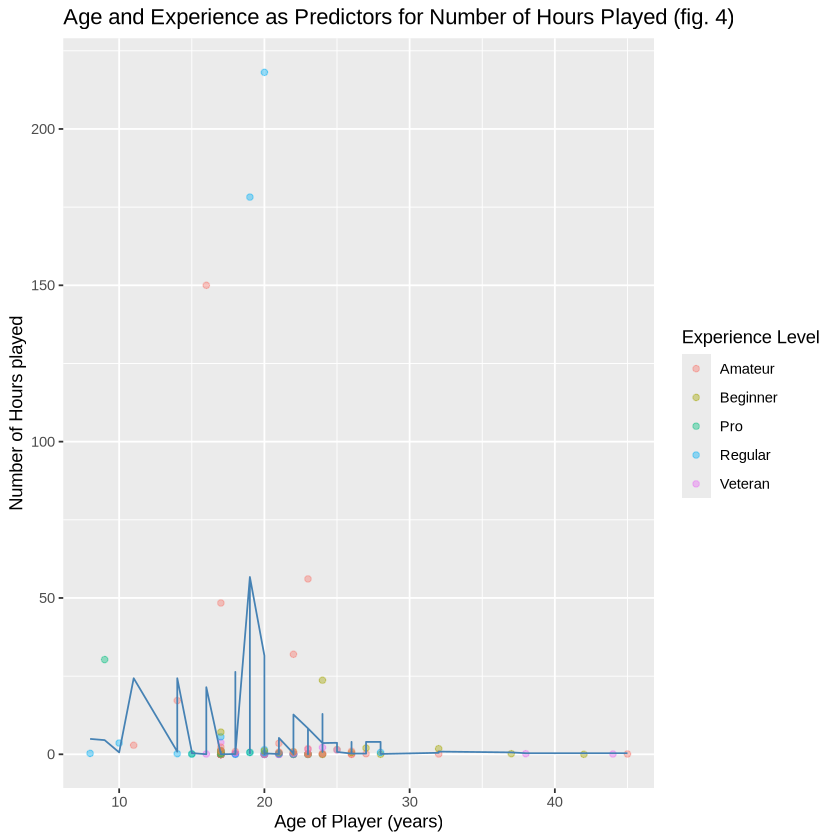

In [18]:
options(repr.plot.width = 7, repr.plot.height = 7)

player_preds <- predict(player_best_fit, player_training) |> bind_cols(player_training) 
player_preds

player_plot <- ggplot(player_preds, aes(x = Age, y = played_hours, color = experience)) + 
                 geom_point(alpha = 0.4) +
                 geom_line(data = player_preds, mapping = aes(x = Age, y = .pred), color = "steelblue") +
                 labs(x = "Age of Player (years)", y = "Number of Hours played", color = "Experience Level") +
                 ggtitle("Age and Experience as Predictors for Number of Hours Played (fig. 4)")
player_plot

# 3. Discussion

__Summary of findings:__
Our findings supported the idea that experience and age could be used as predictors for played hours, however not entirely accurately, as shown in the graph there are too many outliers to predict playtime without error. In the end we found a clear pattern that showed younger players with moderate levels of experience were more likely to play for more hours.
These findings agreed with our expectations, as younger players have more time available to spend online, and players with moderate levels of experience both know that they enjoy the game, but have not played it for too long as to become bored with the game.


__The impacts of such finding:__
Our findings can directly support recruitment and resource planning for the research team. Even though age and experience alone were not highly predictive of playtime, the observed patterns such as increased engagement among regular and younger players can still guide more effective recruitment. For example, targeting users with moderate experience or in younger age brackets may help attract players who are more likely to generate large volumes of in game data. These insights, even if preliminary, can inform strategies for focused outreach and optimize how the team allocates resources such as server capacity and support staff.


__Future questions:__ This work could arise and cause several future questions that could be really interesting in regards to the game developers, some of which can be:
 
- How do __psychographic factors__ like motivation or playstyle impact the quantity and quality of data collected?
- Are there __temporal patterns__ (e.g., weekends or evenings) in which high-engagement players tend to be active?